
# IBM Data Science Capstone Project <br> Determining Coffee-Shop Competitor in York
by Supat T.
### Introduction/Business Problem 
In business, competitors are the most important factor in business planning. The difficulty is to identify competitors in business because we cannot know who will be the competitors that influence our business.
Therefore,the more competitor can be identified well, the greater will be business plan or strategic plann practical possibilities.

The goal of this project is to determine the coffee-shop competitor in York that will allow businesses to plan their business such as store planning, competitor analysis.By using clustering to identify the coffee shop segment.

### Data
I will use information from online and four fight qare with details as follows : 

   <strong>(1)  Postal Codes in Canada : </strong>  Scraping from the Wikipedia. <br>
    (https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969)
    
   <strong>(2) Geographical Coordinates: </strong>  CVS file which consist latitude and longitude of the neighborhoods in Canada.<br>
   (http://cocl.us/Geospatial_data)
    
   <strong>(3) Foursqaure for Fetching Details of the venue : </strong> API Foursqaure that contain :<br>
           - Name of the venue.<br>
           - Venue category type as defined by the API.<br>
           - Latitude value of the venue.<br>
           - Longitude value of the venue.<br>
   (https://developer.foursquare.com/)

### Step 2 : Coding 
#### 2.1 Importing Libraries for project

In [1]:
import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim
import urllib.request
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import folium


#### 2.2 Web scraping for data from the Wikipedia

In [2]:
from bs4 import BeautifulSoup as bs
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969'
source = requests.get(url).text
soup = BeautifulSoup(source,'html.parser')
table= soup.find('table')
toronto_df = pd.read_html(str(table))[0]
toronto_df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


#### 2.3 Data Cleaning (Missing values ) and Select only York Data 

In [29]:
toronto_df.drop(toronto_df[toronto_df['Borough'] == 'Not assigned' ].index, inplace=True)
toronto_df.drop(toronto_df[toronto_df['Neighbourhood'] == 'Not assigned' ].index, inplace=True)
York_Table = toronto_df[toronto_df ['Borough'].str.contains('York',regex=False)]
York_Table.reset_index(drop=True,inplace=True)
York_Table

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M6A,North York,"Lawrence Manor, Lawrence Heights"
3,M3B,North York,Don Mills
4,M4B,East York,"Parkview Hill, Woodbine Gardens"
5,M6B,North York,Glencairn
6,M3C,North York,Don Mills
7,M4C,East York,Woodbine Heights
8,M6C,York,Humewood-Cedarvale
9,M6E,York,Caledonia-Fairbanks


#### 2.4 Import Geographical Coordinates Data

In [4]:
Codi = pd.read_csv('https://cocl.us/Geospatial_data')
#Codi.rename(columns={'Postal Code':'PostalCode'},inplace=True)
Codi

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


#### 2.5 Merge York Table and Geographical Coordinates Table

In [5]:
df= pd.merge(York_Table,Codi, on='Postal Code')
boroughs = df['Borough'].unique().tolist()
df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
5,M6B,North York,Glencairn,43.709577,-79.445073
6,M3C,North York,Don Mills,43.725900,-79.340923
7,M4C,East York,Woodbine Heights,43.695344,-79.318389
8,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
9,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512


#### 2.6  Visualize York Map

In [6]:
lat_York = df['Latitude'].mean()
lon_York  = df['Longitude'].mean()

In [33]:
map_York = folium.Map(location=[lat_York,lon_York],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df['Latitude'],df['Longitude'],df['Borough'],df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='#fa0c18',
    fill=True,
    fill_color='#fa0c18',
    fill_opacity=0.7,
    parse_html=False).add_to(map_York)
map_York

#### 2.7  Foursquare Credentials

In [8]:
CLIENT_ID = # Foursquare ID
CLIENT_SECRET = # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50

#### 2.8  Get Venues Data form Foursquare

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
york_venues = getNearbyVenues(names=df['Neighbourhood'],
                                latitudes=df['Latitude'],
                                longitudes=df['Longitude'])

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills
Parkview Hill, Woodbine Gardens
Glencairn
Don Mills
Woodbine Heights
Humewood-Cedarvale
Caledonia-Fairbanks
Leaside
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Bayview Village
Downsview
York Mills, Silver Hills
Downsview
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview
Bedford Park, Lawrence Manor East
Del Ray, Mount Dennis, Keelsdale and Silverthorn
Humberlea, Emery
Willowdale, Willowdale East
Downsview
Runnymede, The Junction, Weston-Pellam Park, Carlton Village
Weston
York Mills West
Willowdale, Willowdale West


In [11]:
york_venues=york_venues.rename(columns={'Venue Latitude':'Latitude','Venue Longitude':'Longitude'})

#### 2.8 Top 5 Neighborhood,Most Venue in York

In [35]:
VenueCount = york_venues[['Neighborhood','Venue']]
VenueCount.groupby('Neighborhood').count().sort_values(by=['Venue'],ascending=False).head()

,Venue
Neighborhood,
"Fairview, Henry Farm, Oriole",50
"Willowdale, Willowdale East",34
Leaside,32
"Bedford Park, Lawrence Manor East",24
Don Mills,24


#### 2.9 Coffee Shop in York

In [13]:
Coffeshop = york_venues[york_venues['Venue Category'].str.contains('Coffee',)]
Coffeshop

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category
5,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
12,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Tim Hortons,43.719427,-79.467995,Coffee Shop
50,Don Mills,43.725900,-79.340923,Tim Hortons,43.722897,-79.339117,Coffee Shop
58,Don Mills,43.725900,-79.340923,Delimark Cafe,43.727536,-79.339547,Coffee Shop
80,Leaside,43.709060,-79.363452,Aroma Espresso Bar,43.705611,-79.360775,Coffee Shop
94,Leaside,43.709060,-79.363452,Tim Hortons,43.705629,-79.361028,Coffee Shop
96,Leaside,43.709060,-79.363452,Starbucks,43.706564,-79.359591,Coffee Shop
113,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Starbucks,43.755797,-79.440471,Coffee Shop
115,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Tim Hortons,43.754767,-79.443250,Coffee Shop
143,Thorncliffe Park,43.705369,-79.349372,Tim Hortons,43.705090,-79.350545,Coffee Shop


#### 2.10 Cluster York venue data by Density-based Clustering Method

In [14]:
Clus_dataSet = york_venues[['Latitude','Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)


In [15]:
db = DBSCAN(eps=0.02, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
york_venues["Clus_Db"]=labels
print('Number of Cluster =',york_venues['Clus_Db'].max()+1)
york_venues.head()

Number of Cluster = 8


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,0
1,Parkwoods,43.753259,-79.329656,Careful & Reliable Painting,43.752622,-79.331957,Construction & Landscaping,0
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop,0
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena,0
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,0


#### 2.11 Visualize Cluster Distribution

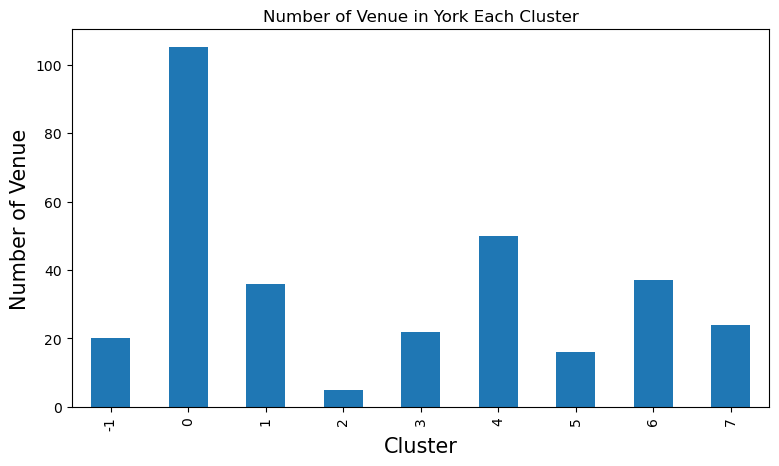

In [16]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Venue in York Each Cluster')
York_plot=york_venues.groupby('Clus_Db')['Clus_Db'].count()
York_plot.plot(kind='bar')
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Number of Venue', fontsize=15)
plt.show()

In [17]:
print('Cluster  count\n',york_venues['Clus_Db'].value_counts())

Cluster  count
  0    105
 4     50
 6     37
 1     36
 7     24
 3     22
-1     20
 5     16
 2      5
Name: Clus_Db, dtype: int64


#### 2.12 Select coffee shope data

In [18]:
Coffeshop = york_venues[york_venues['Venue Category'].str.contains('Coffee',)]
Coffeshop.reset_index(drop=True,inplace=True)
Coffeshop

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
0,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,0
1,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Tim Hortons,43.719427,-79.467995,Coffee Shop,1
2,Don Mills,43.725900,-79.340923,Tim Hortons,43.722897,-79.339117,Coffee Shop,0
3,Don Mills,43.725900,-79.340923,Delimark Cafe,43.727536,-79.339547,Coffee Shop,0
4,Leaside,43.709060,-79.363452,Aroma Espresso Bar,43.705611,-79.360775,Coffee Shop,0
5,Leaside,43.709060,-79.363452,Tim Hortons,43.705629,-79.361028,Coffee Shop,0
6,Leaside,43.709060,-79.363452,Starbucks,43.706564,-79.359591,Coffee Shop,0
7,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Starbucks,43.755797,-79.440471,Coffee Shop,3
8,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Tim Hortons,43.754767,-79.443250,Coffee Shop,3
9,Thorncliffe Park,43.705369,-79.349372,Tim Hortons,43.705090,-79.350545,Coffee Shop,0


#### 2.13 Visualize Coffee shope Cluster Distribution

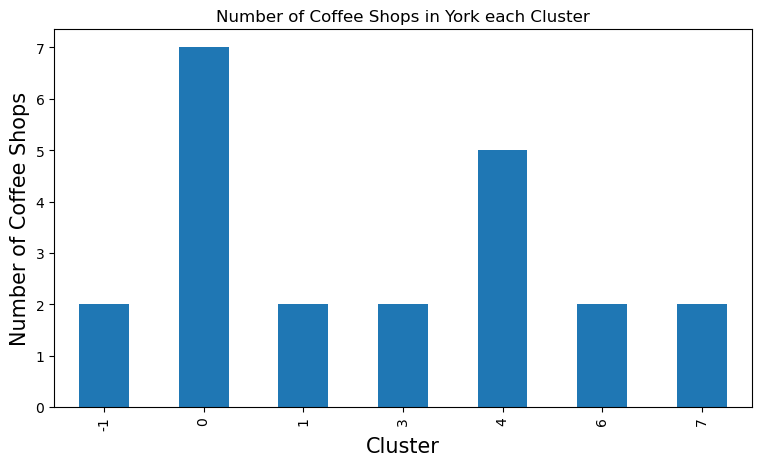

In [19]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Coffee Shops in York each Cluster')
Coffeshop.groupby('Clus_Db')['Clus_Db'].count().plot(kind='bar')
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Number of Coffee Shops', fontsize=15)
plt.show()

#### 2.14 Visualize Coffee shope Map

In [20]:
# add markers to the map
map_clusters = folium.Map(location=[lat_York-0.055,lon_York+0.05], zoom_start=11)

x = np.arange(-1,7)
ys = [i + x + (i*x)**2 for i in range(-1,7)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Coffeshop['Latitude'], Coffeshop['Longitude'], Coffeshop['Neighborhood'], Coffeshop['Clus_Db']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 2.15 Coffee Shop List
### Coffee shop list in <em> Cluster -1 <em>

In [21]:
Coffeshop[Coffeshop['Clus_Db']==-1]


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
15,"Northwood Park, York University",43.767980,-79.487262,Tim Hortons,43.764289,-79.488790,Coffee Shop,-1
21,"Willowdale, Willowdale West",43.782736,-79.442259,Tim Hortons,43.780940,-79.444231,Coffee Shop,-1


 ### Coffee shop list in  <em> Cluster 0  <em>

In [22]:
Coffeshop[Coffeshop['Clus_Db']==0]


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
0,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,0
2,Don Mills,43.725900,-79.340923,Tim Hortons,43.722897,-79.339117,Coffee Shop,0
3,Don Mills,43.725900,-79.340923,Delimark Cafe,43.727536,-79.339547,Coffee Shop,0
4,Leaside,43.709060,-79.363452,Aroma Espresso Bar,43.705611,-79.360775,Coffee Shop,0
5,Leaside,43.709060,-79.363452,Tim Hortons,43.705629,-79.361028,Coffee Shop,0
6,Leaside,43.709060,-79.363452,Starbucks,43.706564,-79.359591,Coffee Shop,0
9,Thorncliffe Park,43.705369,-79.349372,Tim Hortons,43.705090,-79.350545,Coffee Shop,0


 ### Coffee shop list in  <em> Cluster 1  <em>

In [23]:
Coffeshop[Coffeshop['Clus_Db']==1]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
1,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Tim Hortons,43.719427,-79.467995,Coffee Shop,1
18,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,Timothy's World Coffee,43.690072,-79.474599,Coffee Shop,1


 ### Coffee shop list in  <em> Cluster 3  <em>

In [24]:
Coffeshop[Coffeshop['Clus_Db']==3]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
7,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Starbucks,43.755797,-79.440471,Coffee Shop,3
8,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Tim Hortons,43.754767,-79.443250,Coffee Shop,3


 ### Coffee shop list in  <em> Cluster 4  <em>

In [25]:
Coffeshop[Coffeshop['Clus_Db']==4]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
10,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Starbucks,43.777990,-79.344091,Coffee Shop,4
11,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop,4
12,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.777964,-79.344715,Coffee Shop,4
13,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.774993,-79.346303,Coffee Shop,4
14,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.775249,-79.347740,Coffee Shop,4


 ### Coffee shop list in  <em> Cluster 6  <em>

In [26]:
Coffeshop[Coffeshop['Clus_Db']==6]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
19,"Willowdale, Willowdale East",43.77012,-79.408493,Starbucks,43.768353,-79.413046,Coffee Shop,6
20,"Willowdale, Willowdale East",43.77012,-79.408493,Starbucks,43.768464,-79.414017,Coffee Shop,6


 ### Coffee shop list in  <em> Cluster 7  <em>

In [27]:
Coffeshop[Coffeshop['Clus_Db']==7]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Venue Category,Clus_Db
16,"Bedford Park, Lawrence Manor East",43.733283,-79.41975,Tim Hortons,43.735356,-79.419605,Coffee Shop,7
17,"Bedford Park, Lawrence Manor East",43.733283,-79.41975,Starbucks,43.732604,-79.419136,Coffee Shop,7


### Step 3 : Conclusion
According to the data, there are six groups of coffee shops that will help York businesses identify competitors based on their location.For example, if a store is located in Cluster0, there will be a total of 10 competitors worth considering. 

So businesses can use this information to help make business planning decisions.

